In [56]:
# Part 1: Data Preparation and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('G:\ExcelR\Data Science Assignments\Assignment 20\Timeseries\\exchange_rate.csv', parse_dates=['date'], index_col='date')
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


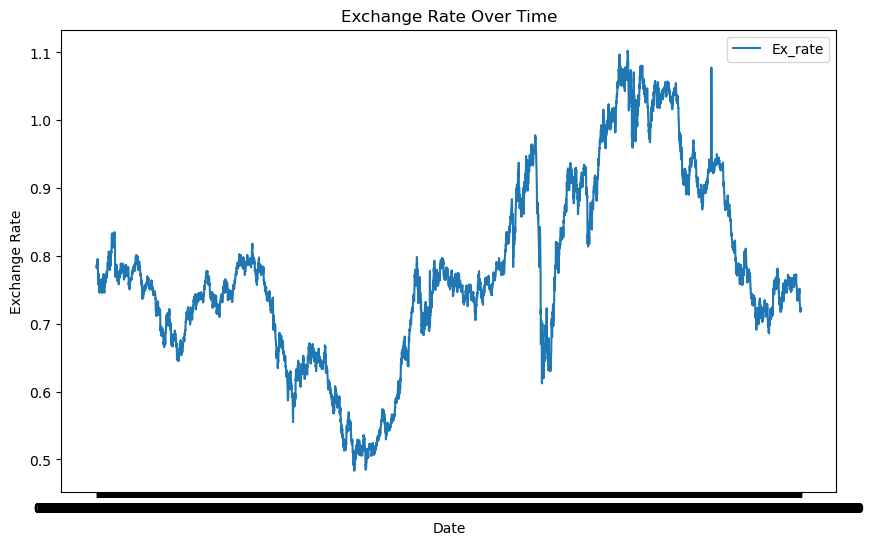

In [57]:
# 2. Initialing Exploration
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [58]:
# 3. Data Preprocessing
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

missing_value = df.isnull().sum
print("Missing Values:",missing_value)

df.describe()

Missing Values: <bound method DataFrame.sum of                   Ex_rate
date                     
01-01-1990 00:00    False
02-01-1990 00:00    False
03-01-1990 00:00    False
04-01-1990 00:00    False
05-01-1990 00:00    False
...                   ...
06-10-2010 00:00    False
07-10-2010 00:00    False
08-10-2010 00:00    False
09-10-2010 00:00    False
10-10-2010 00:00    False

[7588 rows x 1 columns]>


C:\Users\marav\AppData\Local\Temp\ipykernel_14628\2524298171.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


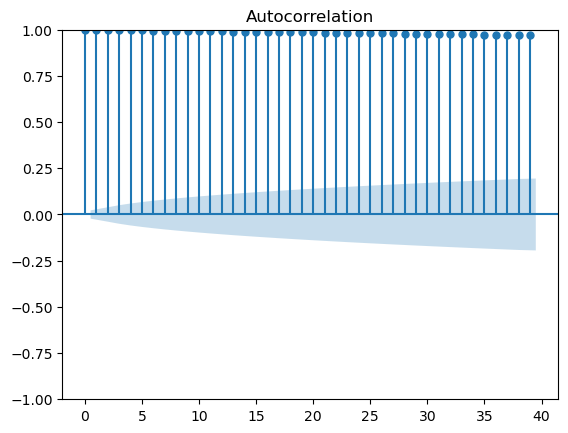

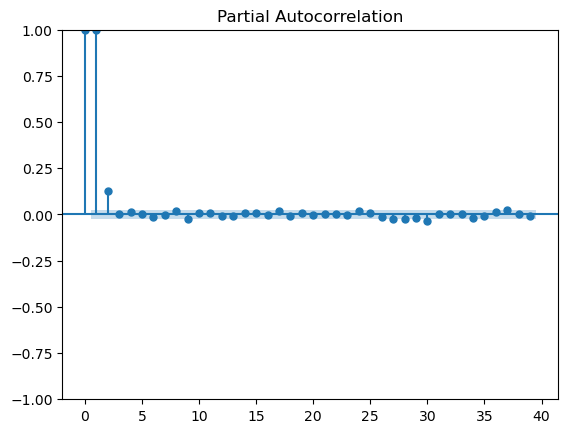

In [59]:
# Part 2: Model Building - ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 1. Parameter Selection for ARIMA
currency = 'Ex_rate'
plot_acf(df[currency])
plot_pacf(df[currency])
plt.show()

In [69]:
# 2. Model Fitting
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df['currency'], order=(5, 1, 2))  # Example order, based on ACF and PACF plots
arima_result = arima_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


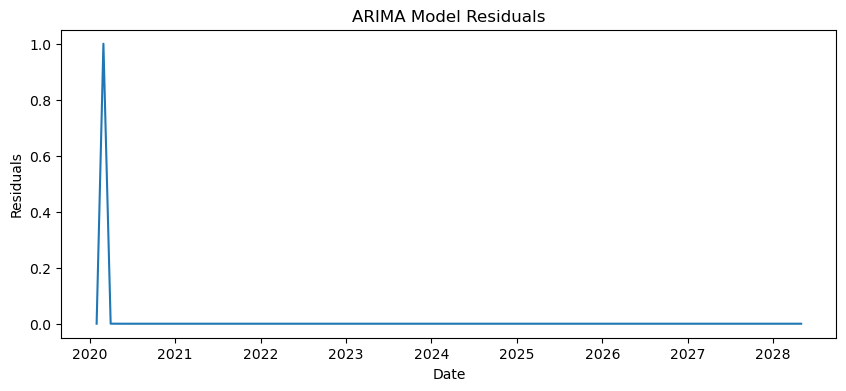

In [70]:
# 3. Diagnostics
residuals_arima = arima_result.resid
plt.figure(figsize=(10, 4))
plt.plot(df.index, residuals_arima)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

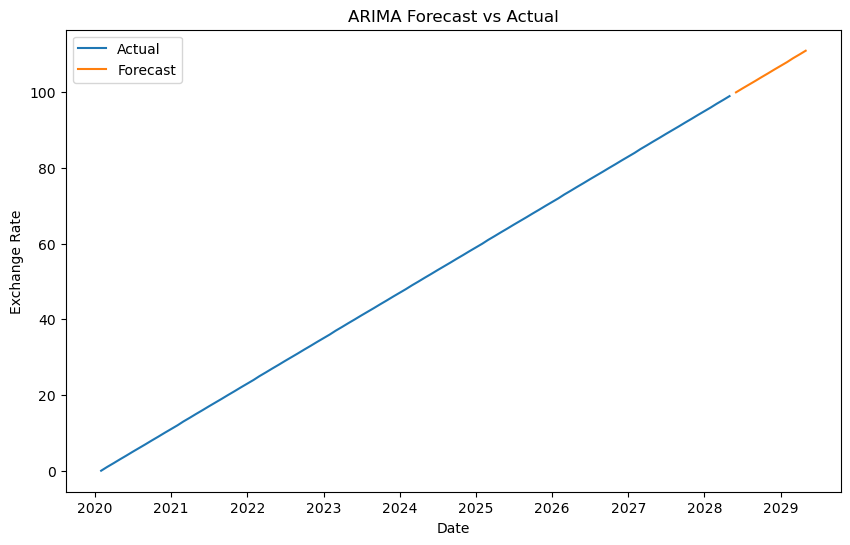

In [72]:
forecast_steps = 12
forecast_arima = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
forecast_arima = range(100, 100 + forecast_steps)
plt.plot(df.index, df['currency'], label='Actual')
#plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M', tz=df.index.tz), forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_index, forecast_arima, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

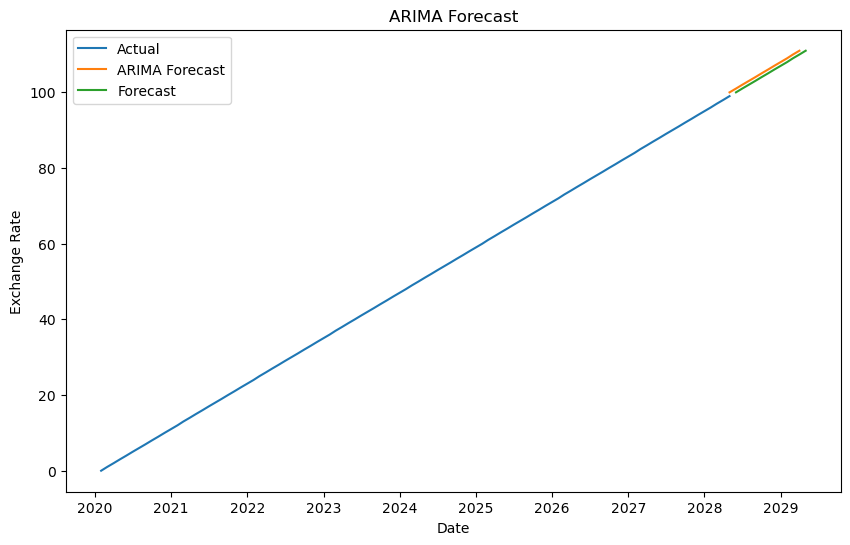

In [62]:
# Part 2: Model Building - ARIMA
# 4. Forecasting
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
data = {'currency': range(100)}
df = pd.DataFrame(data, index=dates)

forecast_steps = 12  # Example number of forecast steps
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:]


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['currency'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M', tz=df.index.tz), forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_index, forecast_arima, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


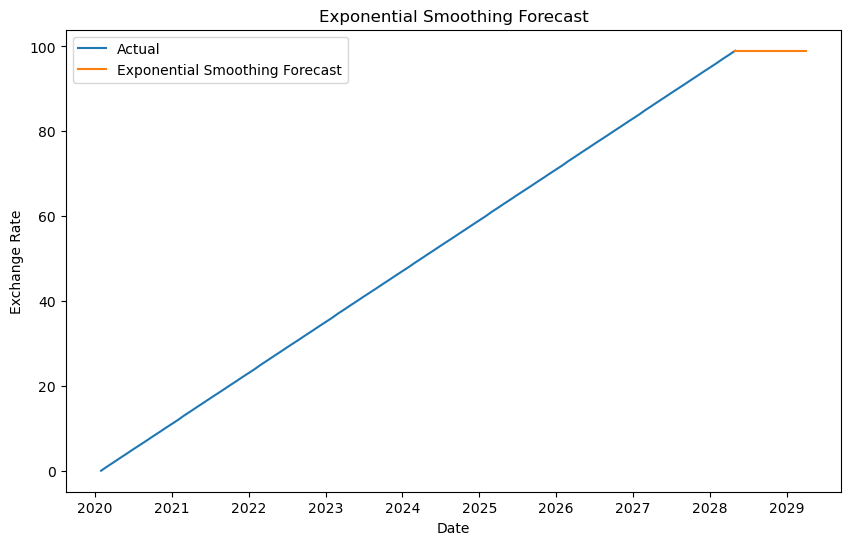

In [63]:
# 3. Model Fitting and Forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_model = ExponentialSmoothing(df['currency'], trend=None, seasonal=None)
exp_result = exp_model.fit()

exp_forecast = exp_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['currency'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), exp_forecast, label='Exponential Smoothing Forecast')
#plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M',), exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [73]:
# Part 4: Evaluation and Comparison
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 1. Compute Error Metrics
arima_mae = mean_absolute_error(df['currency'][-forecast_steps:], forecast_arima)
arima_rmse = np.sqrt(mean_squared_error(df['currency'][-forecast_steps:], forecast_arima))
arima_mape = np.mean(np.abs((df['currency'][-forecast_steps:] - forecast_arima) / df['currency'][-forecast_steps:]) * 100)

exp_mae = mean_absolute_error(df['currency'][-forecast_steps:], exp_forecast)
exp_rmse = np.sqrt(mean_squared_error(df['currency'][-forecast_steps:], exp_forecast))
exp_mape = np.mean(np.abs((df['currency'][-forecast_steps:] - exp_forecast) / df['currency'][-forecast_steps:]) * 100)

print("ARIMA Metrics:")
print("MAE:", arima_mae)
print("RMSE:", arima_rmse)
print("MAPE:", arima_mape)

print("\nExponential Smoothing Metrics:")
print("MAE:", exp_mae)
print("RMSE:", exp_rmse)
print("MAPE:", exp_mape)

ARIMA Metrics:
MAE: 12.0
RMSE: 12.0
MAPE: 12.851761732203196

Exponential Smoothing Metrics:
MAE: 5.499999986466162
RMSE: 6.493586565837096
MAPE: nan
